In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../../Python for ML/DATA/gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

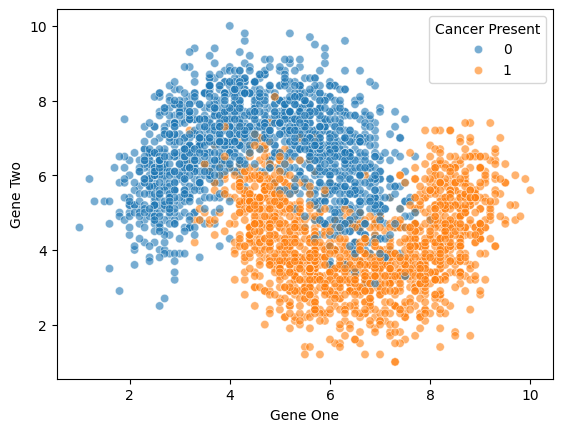

In [6]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6)

In [7]:
len(df)

3000

(2.0, 6.0)

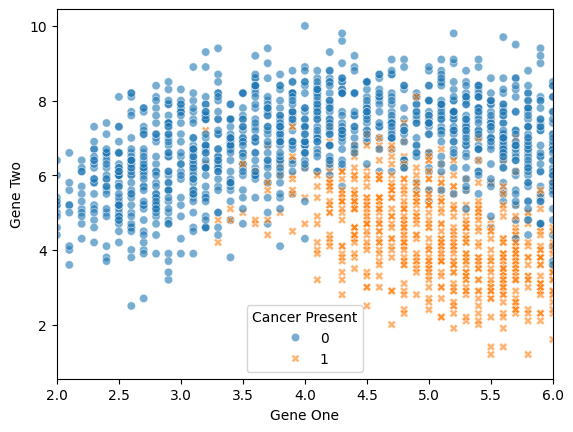

In [9]:
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6, style='Cancer Present')
plt.xlim(2, 6)

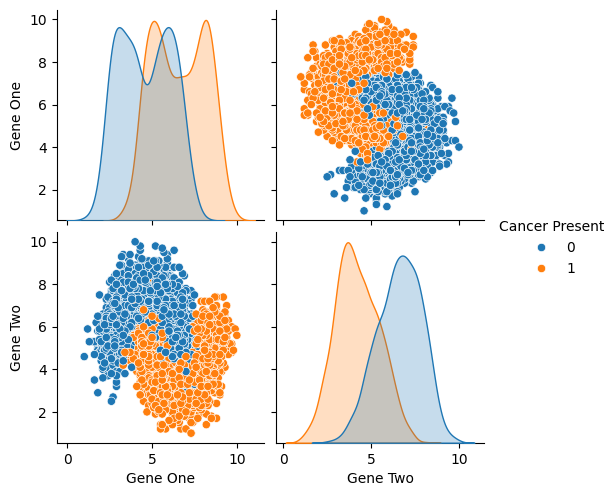

In [12]:
sns.pairplot(data=df, hue='Cancer Present')

In [14]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)

In [18]:
scaled_X_test = scaler.transform(X_test)

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn_model.predict(X_test)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       423
           1       0.91      0.92      0.91       477

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



In [25]:
confusion_matrix(y_test, y_pred)

array([[379,  44],
       [ 40, 437]])

In [26]:
df['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

In [29]:
test_errors_rates = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    y_pred_test = knn_model.predict(scaled_X_test)

    test_errors_rates.append(1 - accuracy_score(y_test, y_pred_test))

In [30]:
test_errors_rates

[0.08777777777777773,
 0.09111111111111114,
 0.06999999999999995,
 0.06555555555555559,
 0.06555555555555559,
 0.06000000000000005,
 0.06333333333333335,
 0.06444444444444442,
 0.06555555555555559,
 0.06444444444444442,
 0.06777777777777783,
 0.06444444444444442,
 0.06666666666666665,
 0.06444444444444442,
 0.06777777777777783,
 0.06222222222222218,
 0.06000000000000005,
 0.061111111111111116,
 0.06222222222222218,
 0.06333333333333335,
 0.06222222222222218,
 0.06555555555555559,
 0.061111111111111116,
 0.05888888888888888,
 0.06222222222222218,
 0.06555555555555559,
 0.06222222222222218,
 0.061111111111111116,
 0.061111111111111116]

Text(0.5, 0, 'K Neighbors')

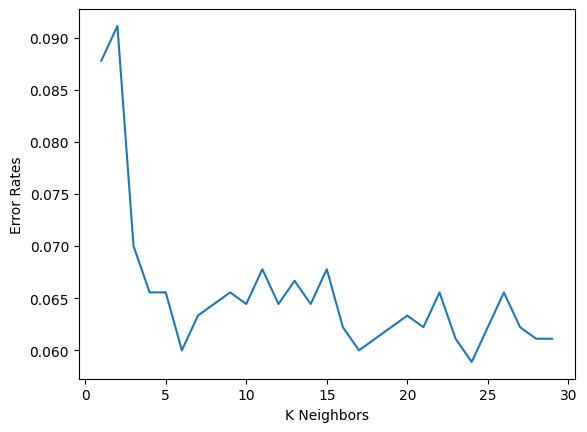

In [31]:
plt.plot(range(1, 30), test_errors_rates)
plt.ylabel('Error Rates')
plt.xlabel('K Neighbors')

In [32]:
# Pipleline

In [34]:
scaler = StandardScaler()

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [37]:
operations = [
    ('scaler', scaler),
    ('knn', knn)
]

In [38]:
pipe = Pipeline(operations)

In [40]:
k_values = list(range(1, 20))

In [41]:
param_grid = {
    'knn__n_neighbors': k_values
}

In [42]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [43]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [45]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [46]:
full_predictions = full_cv_classifier.predict(X_test)

In [47]:
print(classification_report(y_test, full_predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       423
           1       0.93      0.95      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [48]:
new_patient = [[3.8, 6.4]]

In [49]:
full_cv_classifier.predict(new_patient)

/usr/local/Cellar/jupyterlab/4.4.0_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [50]:
full_cv_classifier.predict_proba(new_patient)

/usr/local/Cellar/jupyterlab/4.4.0_1/libexec/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.73684211, 0.26315789]])